In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

# Простейший пример

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
# classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

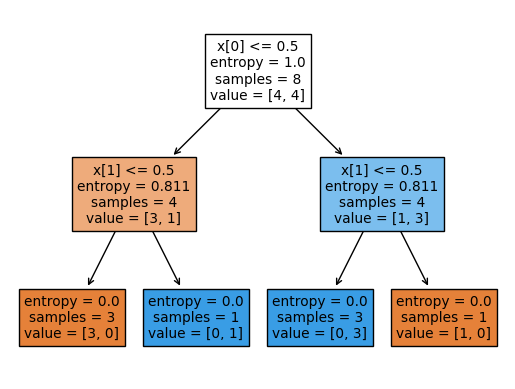

In [7]:
tree.plot_tree(clf,filled=True)

# Разбор на примере титаника

In [8]:
titanic_data = pd.read_csv('train.csv') #https://stepik.org/media/attachments/course/4852/titanic.csv или с kaggle
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# подсчет кол-ва пропущенных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# отбор признаков для обучения
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
y = titanic_data.Survived

In [13]:
# OneHotEncoding (DecisionTreeClassifier не работает со строками
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
# Заполение пропусков Nan по той же причине
X = X.fillna({'Age': X.Age.median()})

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.617627840909091, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.39457386363636365, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.196875, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.06727272727272728, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.06, 0.775, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.05272727272727273, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.06727272727272728, 0.725, 'Fare <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07454545454545454, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07454545454545454, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3264772727272727, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\nsamples = 400\nvalue = [359, 41]'),
 Te

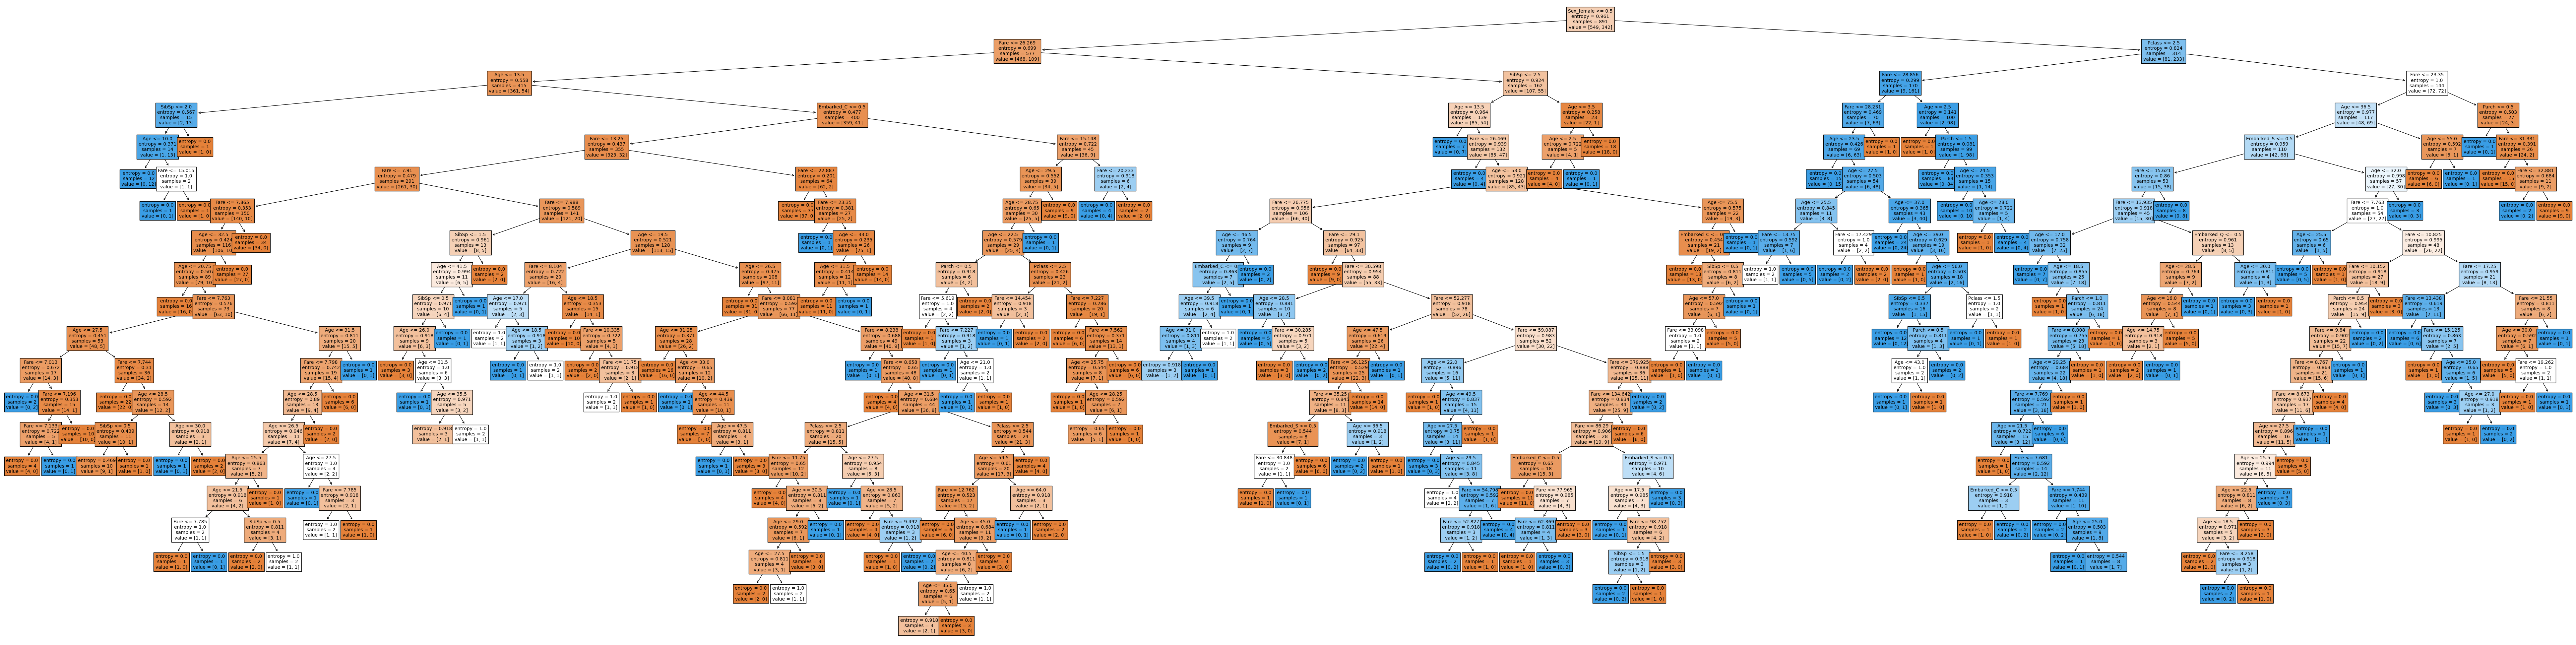

In [16]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

Видно, что произошло переобучение: так как глубина дерева не была ограничена, то оно увеличивалось то тех пор, пока энтропия не стала равна 0.

Чтобы это исправить, сделаем следующее:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
# проверка, как хорошо модель классифицирует на данных обучения
clf.score(X, y)

0.9797979797979798

In [19]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [20]:
# проверка на тестовой выборке
clf.score(X_test, y_test)

0.7627118644067796

In [21]:
# действительно, на тестовых данных результат заметно хуже 
# уменьшим глубину дерева и проверим снова
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
clf.score(X_train, y_train)

0.8338926174496645

In [23]:
clf.score(X_test, y_test)

0.823728813559322

In [24]:
# переберем теперь возможные варианты
max_depth_values = range(1, 100)

scores_data = pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    tmp_score = pd.DataFrame({'max_depth': [max_depth], 
                              'train_score': [train_score], 
                              'test_score': [test_score]})
    scores_data = pd.concat([scores_data, tmp_score])

scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [26]:
# преобразуем данные в другой вид
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score'], 
                           var_name = 'set_type', value_name = 'score')

scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

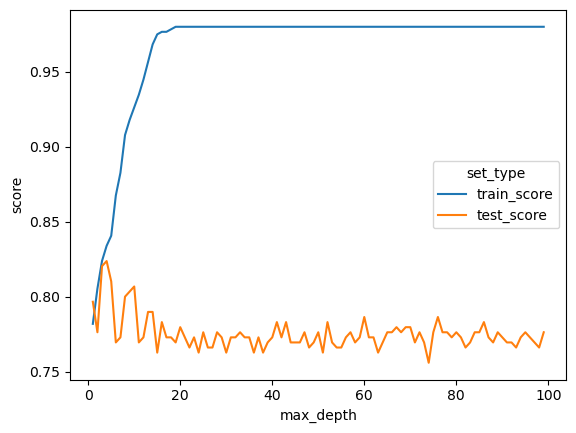

In [27]:
# график распределения scores от глубины дерева
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

Сравнение как выше нельзя считать корректным, так как проверяем успешность мы всегда на одних и тех же данных. Решить данную проблему поможет кросс-валидация

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# cv - количество фолдов, на которые разбиваем выборку
# результат - список score на каждом фолде
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

<Axes: xlabel='max_depth', ylabel='score'>

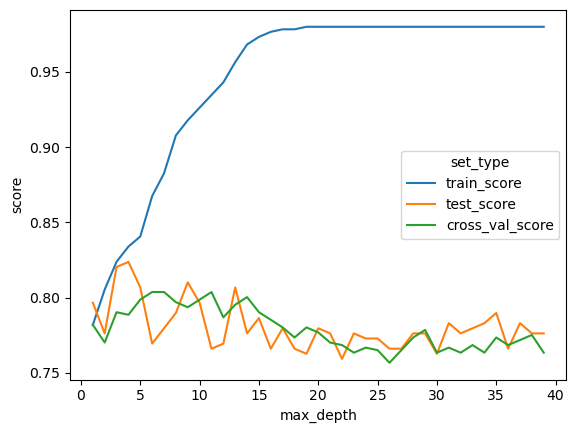

In [30]:
# модифицорованный алгоритм выше

max_depth_values = range(1, 40)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # new line
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    # new param
    tmp_score = pd.DataFrame({'max_depth': [max_depth], 
                              'train_score': [train_score], 
                              'test_score': [test_score],
                              'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, tmp_score])
    

# new param in value_vars
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                           var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [31]:
# проверка лучшей глубины
scores_data_long = scores_data_long[scores_data_long.set_type == 'cross_val_score']   
scores_data_long[scores_data_long['score'] == scores_data_long['score'].max()]

,max_depth,set_type,score
83,6,cross_val_score,0.803754


In [32]:
# проверка получившейся глубины на тестовой выборке
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8

#### Автоматизация тех же действий


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
clf = tree.DecisionTreeClassifier()

In [35]:
# параметры, которые будут использоваться для сравнений моделей
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [36]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [37]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [38]:
# какие параметры оказались лучшими на данных
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [39]:
# выбор лучшей модели
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [40]:
from sklearn.metrics import precision_score, recall_score
# подсчет precision и recall для полученной модели

In [41]:
y_pred = best_clf.predict(X_test)

In [42]:
precision_score(y_test, y_pred)

0.7570093457943925

In [43]:
recall_score(y_test, y_pred)

0.675

In [44]:
# рассмотрение вероятности отнесения к классу
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.80952381, 0.19047619],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.6       , 0.4       ],
       [0.80952381, 0.19047619],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

<Axes: >

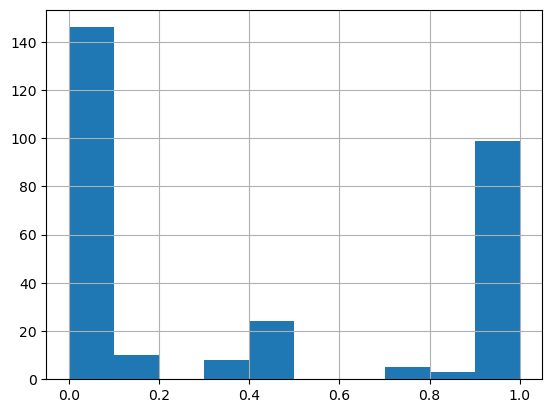

In [45]:
# распределение вероятности отнесения ко второму классу
pd.Series(y_predicted_prob[:, 1]).hist()

In [46]:
# перекодировка, больше 0.8, тогда 1, иначе 0
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [47]:
precision_score(y_test, y_pred)

0.7745098039215687

In [48]:
recall_score(y_test, y_pred)

0.6583333333333333

In [49]:
# изменим теперь порог на 0.2
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)
precision_score(y_test, y_pred)

0.6834532374100719

In [50]:
recall_score(y_test, y_pred)

0.7916666666666666

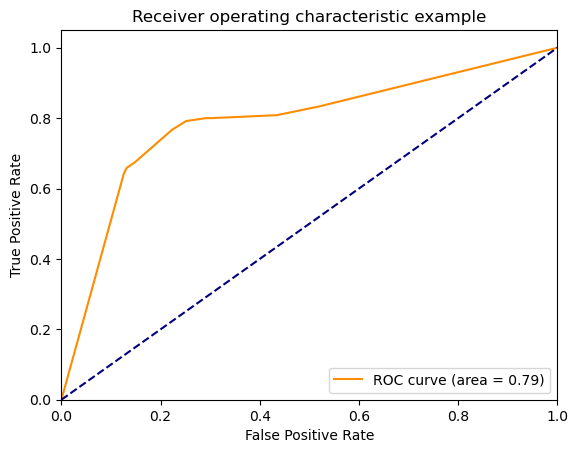

In [51]:
# ROC кривая 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
# min_samples_split ограничивает минимальный размер выборки для разбиения
# min_samples_leaf ограничивает минимальный размер выборки листа после разбиения
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [53]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

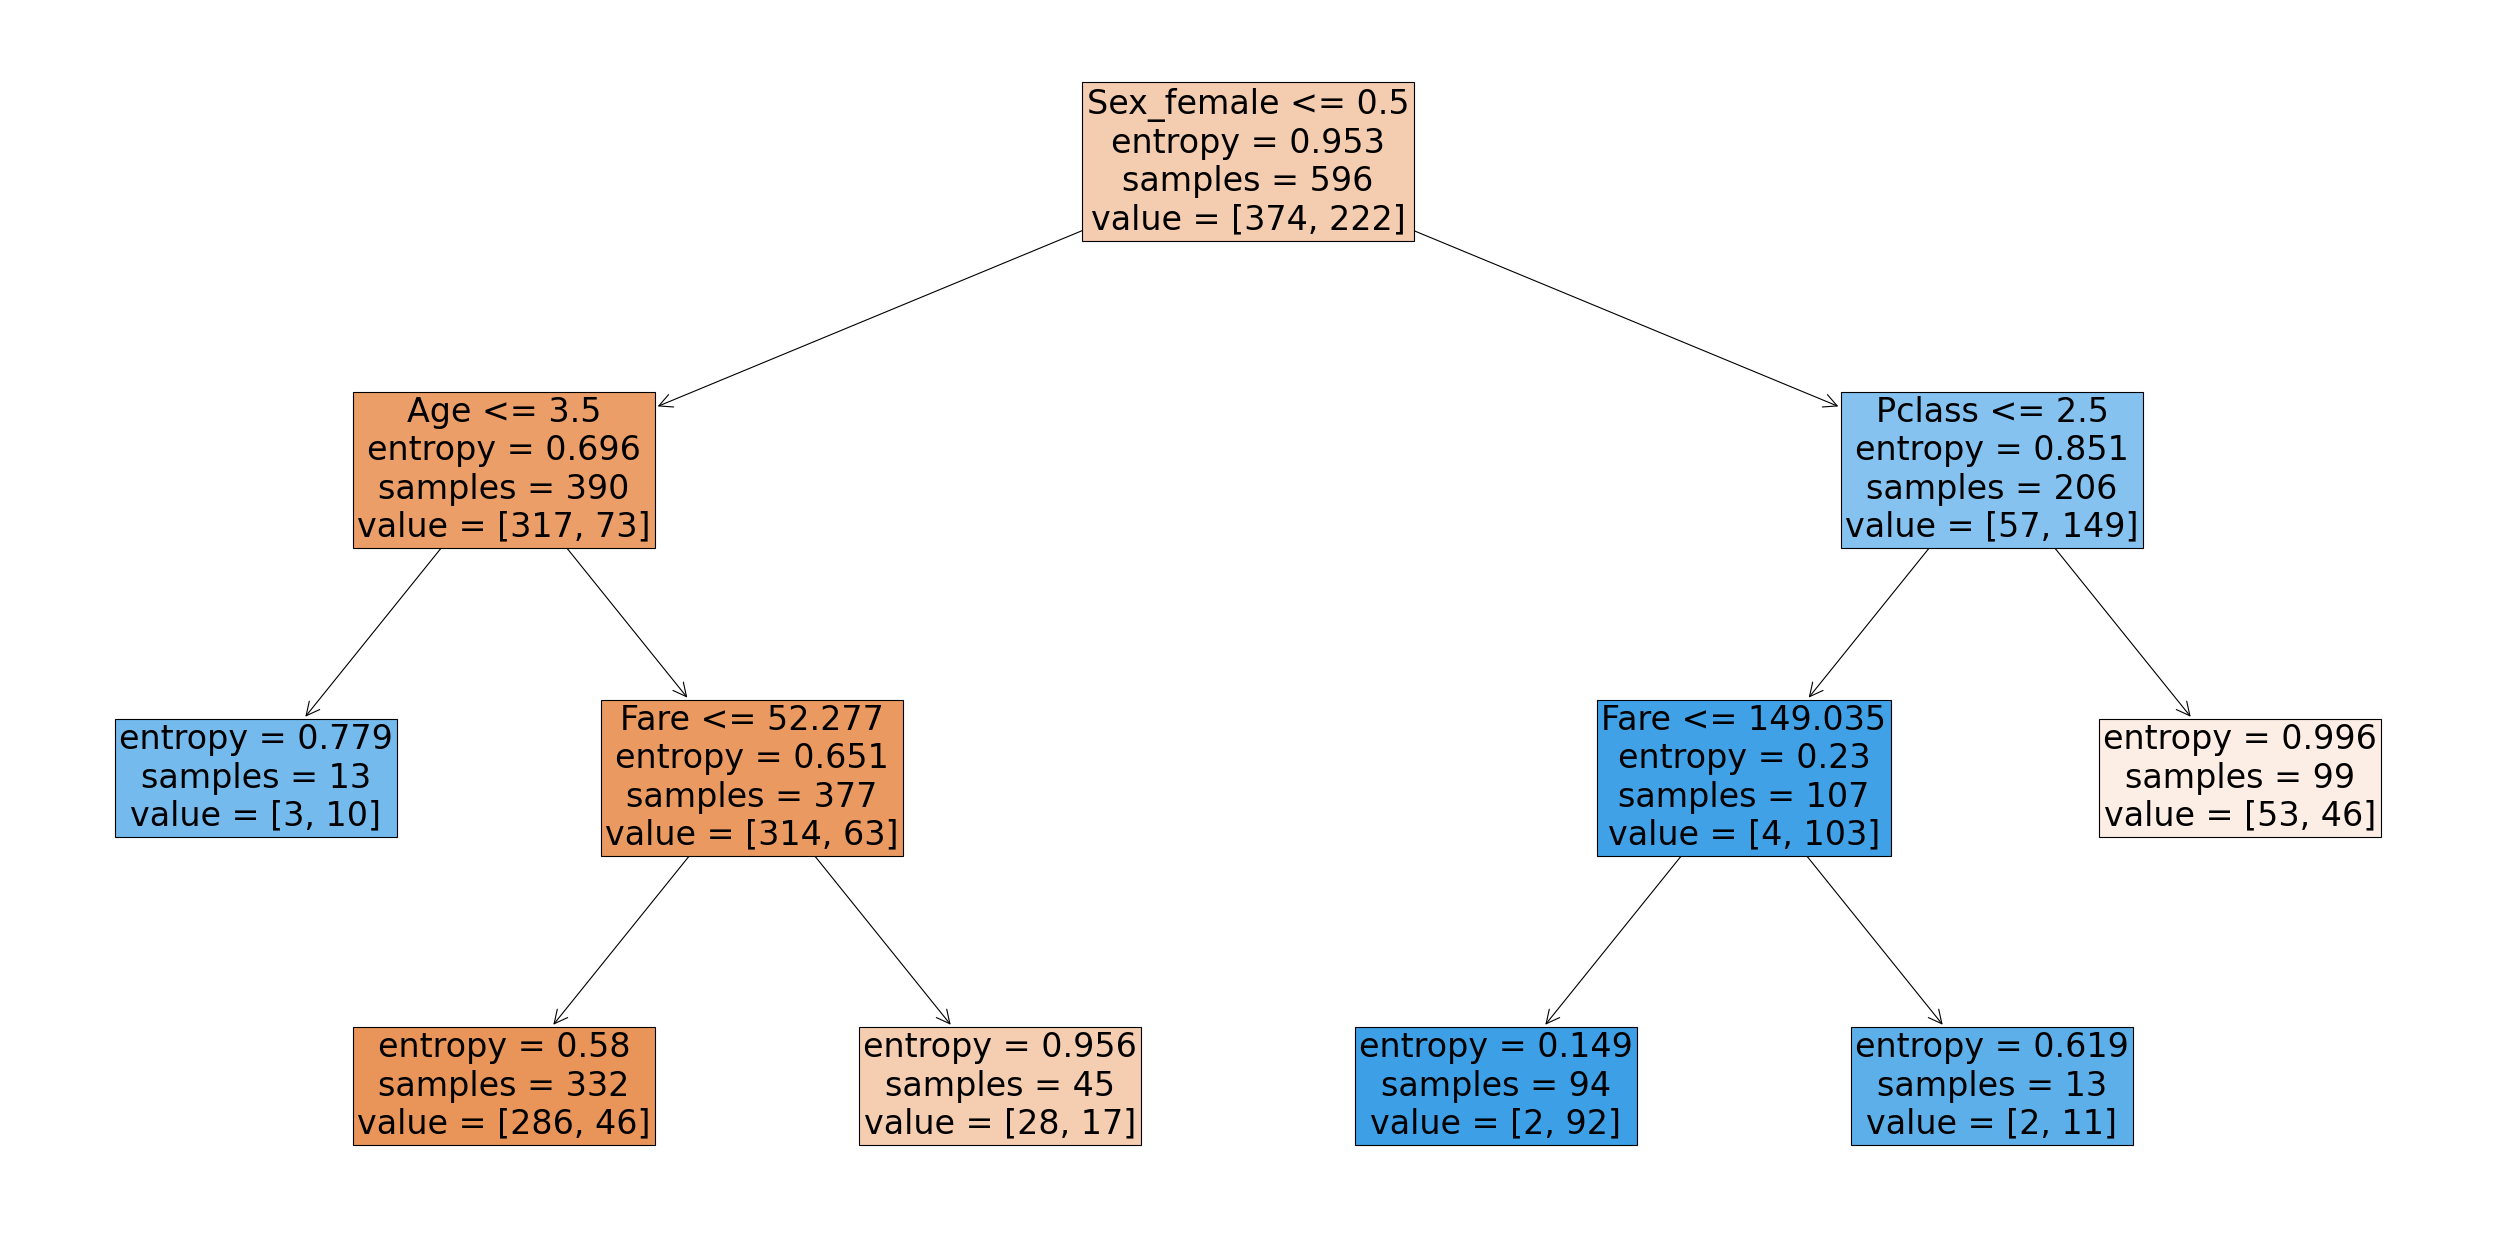

In [54]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

In [55]:
# подбор для большего числа параметров
from sklearn.model_selection import RandomizedSearchCV

In [56]:
clf = tree.DecisionTreeClassifier()

In [57]:
parametrs = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 30),
             'min_samples_split': range(30, 250),
             'min_samples_leaf': range(1, 20)}

In [58]:
random_search_cv_clf = RandomizedSearchCV(clf, parametrs, cv=5)

In [59]:
random_search_cv_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(30, 250)})

In [60]:
best_clf = random_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=68)

In [61]:
y_pred = best_clf.predict(X_test)

In [62]:
precision_score(y_test, y_pred)

0.8316831683168316

In [63]:
recall_score(y_test, y_pred)

0.7